In [56]:
import os
import networkx as nx
import freeman as fm
import matplotlib.pyplot as plt
import numpy as np


In [57]:
from statsmodels.api import OLS

g = fm.load('./finaltopic__2.gml')
g.set_nodecol('score', 'score')
g.set_nodecol('titulo', 'title')
df = g.nodeframe
b = nx.betweenness_centrality(g)
!say alert

In [58]:
df['betweenness'] = [b[n] for n in b]
df['degree']=[n for n in nx.degree_centrality(g).values()]
print(df.head(5))
# !say acabou

   id  score                             titulo  betweenness    degree
0   0   7.22                .hack//G.U. Trilogy     0.001508  0.226082
1   1   6.67                  .hack//Liminality     0.000071  0.070615
2   2   6.99                       .hack//Roots     0.000731  0.236333
3   3   7.07                        .hack//Sign     0.000053  0.074601
4   4   6.67  .hack//Tasogare no Udewa Densetsu     0.000619  0.191913


In [59]:
model = OLS(list(df['score']), list(df['betweenness']))
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.185
Model:                            OLS   Adj. R-squared (uncentered):              0.185
Method:                 Least Squares   F-statistic:                              399.7
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                    2.80e-80
Time:                        19:41:04   Log-Likelihood:                         -5668.2
No. Observations:                1757   AIC:                                  1.134e+04
Df Residuals:                    1756   BIC:                                  1.134e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2231.1551    111.600     19.992      0.000    2012.272    2450.039
==============================================================================
Omnibus:                     1457.827   Durbin-Watson:                   0.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38428.045
Skew:                          -3.810   Prob(JB):                         0.00
Kurtosis:                      24.607   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
v = np.array(list(zip(df['betweenness'],list(df['degree']))))
model = OLS(list(df['score']),v)
res = model.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.661
Model:                            OLS   Adj. R-squared (uncentered):              0.661
Method:                 Least Squares   F-statistic:                              1715.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                        0.00
Time:                        19:49:29   Log-Likelihood:                         -4896.7
No. Observations:                1757   AIC:                                      9797.
Df Residuals:                    1755   BIC:                                      9808.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1944.9942    110.654    -17.577      0.000   -2162.021   -1727.967
x2            46.0481      0.927     49.682      0.000      44.230      47.866
==============================================================================
Omnibus:                       53.449   Durbin-Watson:                   0.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.695
Skew:                          -0.372   Prob(JB):                     9.81e-12
Kurtosis:                       2.626   Cond. No.                         184.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

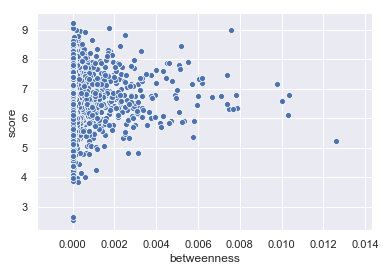

In [67]:
# !say acabou
fm.scaplot(df,'betweenness','score')


In [98]:
fm.cortest(df,'score', 'betweenness')
# fm.cortest(df,'score', 'degree')

(0.020618, 0.387748)

<IPython.core.display.Javascript object>


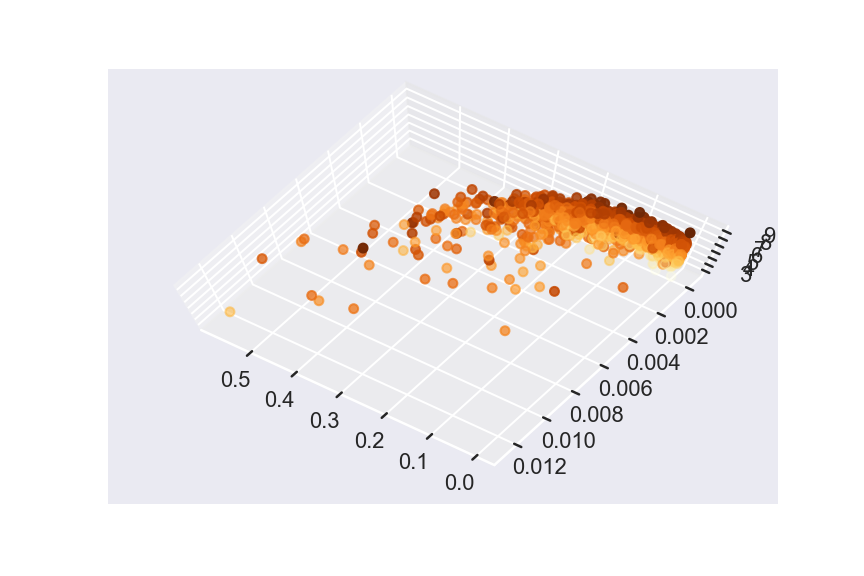

1757 1757 1757


In [119]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')


x = list(df['degree'])
y = list(df['betweenness'])
z = list(df['score'])

# print(len(x),len(y),len(z))
# ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
ax.scatter3D(x, y, z, c=z, cmap='YlOrBr')


In [109]:
# import numpy as np
# import matplotlib.pyplot as plt


# def z_func(x, y):
#     return (1 - (x ** 2 + y ** 3)) * np.exp(-(x ** 2 + y ** 2) / 2)

# x = np.arange(-3.0, 3.0, 0.1)
# y = np.arange(-3.0, 3.0, 0.1)
# X, Y = np.meshgrid(x, y)
# Z = z_func(X, Y) 

# Z[0]
# # im = plt.imshow(Z, cmap=plt.cm.RdBu, extent=(-3, 3, 3, -3))  
# # cset = plt.contour(Z, np.arange(-1, 1.5, 0.2), linewidths=2,
# #                    cmap=plt.cm.Set2,
# #                    extent=(-3, 3, -3, 3))
# # plt.clabel(cset, inline=True, fmt='%1.1f', fontsize=10)
# # plt.colorbar(im)  

# # plt.title('$z=(1-x^2+y^3) e^{-(x^2+y^2)/2}$')

# # plt.show()